In [ ]:
!pip install 

In [1]:
import os
import random
import numpy as np
from io import BytesIO

# Plotting and dealing with images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import tensorflow as tf
import pathlib

# Interactive widgets
from ipywidgets import widgets

In [2]:
BASE_DIR = '../tomato'

train_dir = os.path.join(BASE_DIR, 'train')
val_dir = os.path.join(BASE_DIR, 'val')

train_bacterial_dir = os.path.join(train_dir, 'Bacterial_spot')
train_early_dir = os.path.join(train_dir, 'Early_blight')
train_healthy_dir = os.path.join(train_dir, 'healthy')
train_mold_dir = os.path.join(train_dir, 'Leaf_Mold')
train_spot_dir = os.path.join(train_dir, 'Target_Spot')
train_yellow_dir = os.path.join(train_dir, 'Yellow_Leaf_Curl_Virus')

# Directory with validation cat/dog pictures
val_bacterial_dir = os.path.join(val_dir, 'Bacterial_spot')
val_early_dir = os.path.join(val_dir, 'Early_blight')
val_healthy_dir = os.path.join(val_dir, 'healthy')
val_mold_dir = os.path.join(val_dir, 'Leaf_Mold')
val_spot_dir = os.path.join(val_dir, 'Target_Spot')
val_yellow_dir = os.path.join(val_dir, 'Yellow_Leaf_Curl_Virus')

print(f"Contents of base directory: {os.listdir(BASE_DIR)}")

print(f"\nContents of train directory: {train_dir}")

print(f"\nContents of validation directory: {val_dir}")


Contents of base directory: ['cnn_train.ipnyb', 'cnn_train2.py', 'savedmodel', 'saved_model', 'tomato.h5', 'tomato.tflite', 'tomato_leaf_3_class.ipynb', 'train', 'train2', 'val', 'val2', 'vegs.tflite']

Contents of train directory: ../tomato\train

Contents of validation directory: ../tomato\val


In [3]:
train_bacterial_fnames = os.listdir(train_bacterial_dir)
train_early_fnames = os.listdir(train_early_dir)
train_healthy_fnames = os.listdir(train_healthy_dir)
train_mold_fnames = os.listdir(train_mold_dir)
train_spot_fnames = os.listdir(train_spot_dir)
train_yellow_fnames = os.listdir(train_yellow_dir)

print(f"5 files in bacterial subdir: {train_bacterial_fnames[:5]}")
print(f"5 files in early subdir: {train_early_fnames[:5]}")
print(f"5 files in healthy subdir: {train_healthy_fnames[:5]}")
print(f"5 files in mold subdir: {train_mold_fnames[:5]}")
print(f"5 files in spot subdir: {train_spot_fnames[:5]}")
print(f"5 files in yellow subdir: {train_yellow_fnames[:5]}")


5 files in bacterial subdir: ['00416648-be6e-4bd4-bc8d-82f43f8a7240___GCREC_Bact.Sp 3110.JPG', '01375198-62af-4c40-bddf-f3c11107200b___GCREC_Bact.Sp 5914.JPG', '05777829-6912-44bb-bcef-901bc5190584___GCREC_Bact.Sp 6150.JPG', '070228e2-ba4e-4de8-813b-074e51ed6f5a___UF.GRC_BS_Lab Leaf 0661.JPG', '07238109-52ed-4369-b16c-6f5844858b81___UF.GRC_BS_Lab Leaf 0447.JPG']
5 files in early subdir: ['0012b9d2-2130-4a06-a834-b1f3af34f57e___RS_Erly.B 8389.JPG', '0034a551-9512-44e5-ba6c-827f85ecc688___RS_Erly.B 9432.JPG', '004cbe60-8ff9-4965-92df-e86694d5e9ba___RS_Erly.B 8253.JPG', '0114f7b3-7f56-4bef-aa47-7a82da142d4b___RS_Erly.B 7437.JPG', '011aa278-a39e-40b0-b6e4-2e2f835889f0___RS_Erly.B 8251.JPG']
5 files in healthy subdir: ['000146ff-92a4-4db6-90ad-8fce2ae4fddd___GH_HL Leaf 259.1.JPG', '003944fc-3b99-4a0f-9ed4-0e07352fd8b3___RS_HL 9844.JPG', '01700b46-3800-46c6-ab81-09a5f50af525___RS_HL 0108.JPG', '0172e56c-8bb8-4e75-8ac7-509df81393e8___RS_HL 0580.JPG', '0184dc6b-bfc1-4515-ac59-bbadaf524e1a___GH

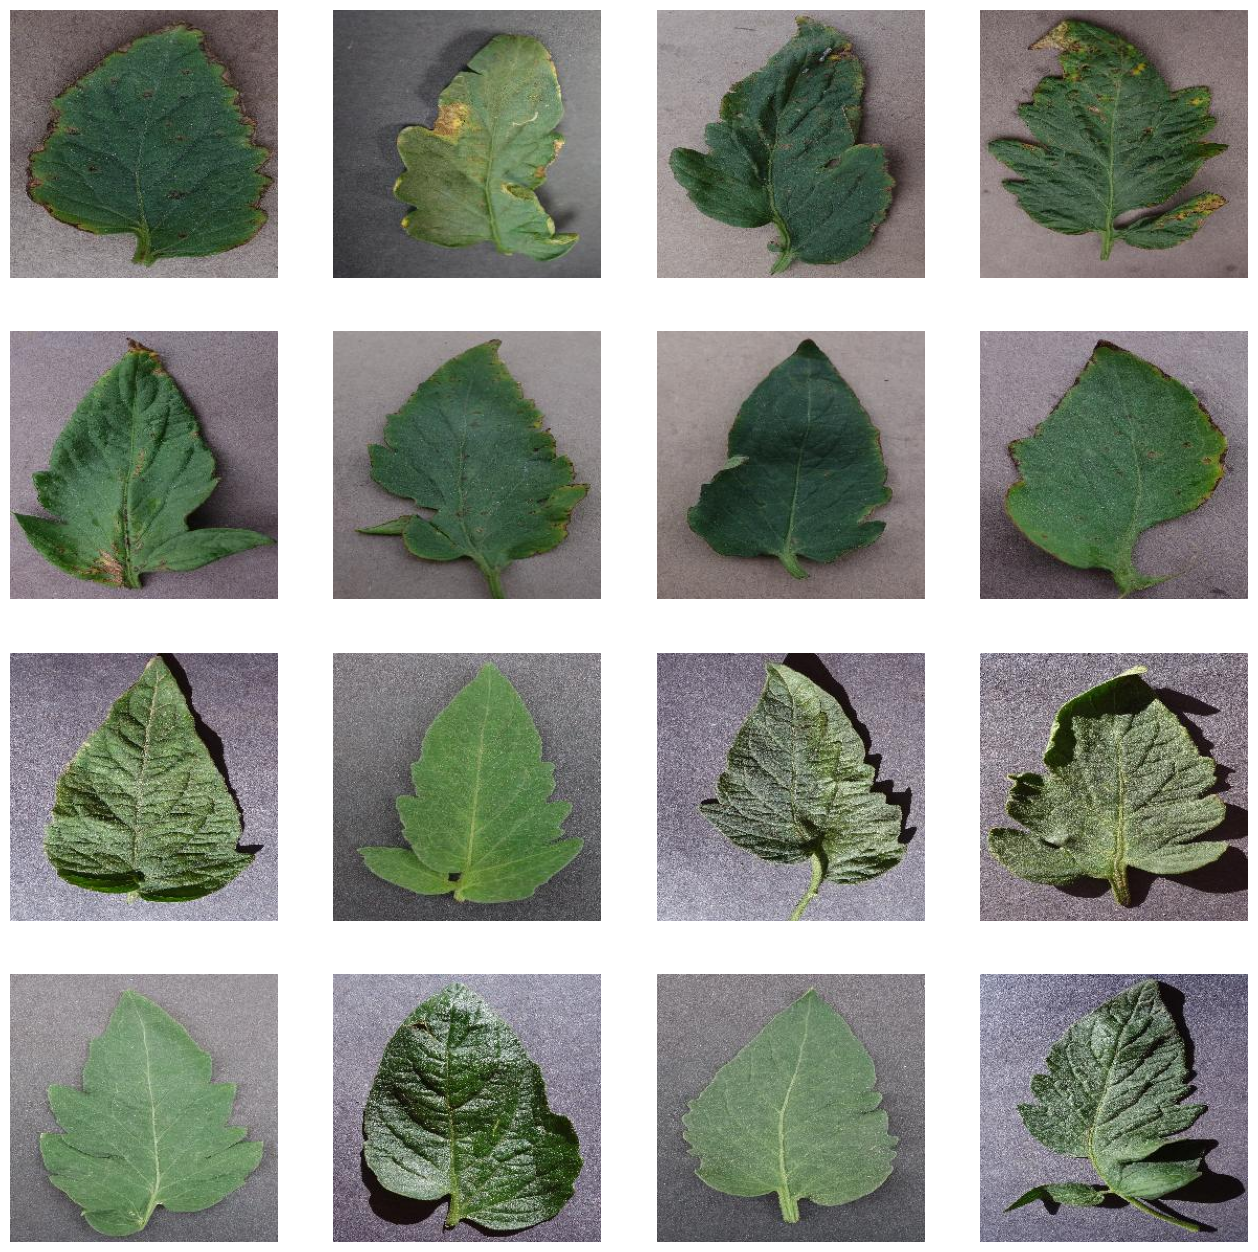

In [4]:
# Parameters for your graph; you will output images in a 4x4 configuration
nrows = 4
ncols = 4

# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

next_cat_pix = [os.path.join(train_bacterial_dir, fname)
                for fname in random.sample(train_bacterial_fnames, k=8)]

next_dog_pix = [os.path.join(train_healthy_dir, fname)
                for fname in random.sample(train_healthy_fnames, k=8)]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
    # Set up subplot; subplot indices start at 1
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') # Don't show axes (or gridlines)

    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

In [5]:
model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(150, 150, 3)),
    # Rescale the image. Note the input shape is the desired size of the image: 150x150 with 3 bytes for color
    tf.keras.layers.Rescaling(1./255),
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])

model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 150, 150, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)      

In [6]:
model.compile(
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics = ['accuracy']
    )

In [7]:
# Instantiate the training dataset
train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=(150, 150),
    batch_size=32,
    label_mode='categorical'
    )

# Instantiate the validation dataset
validation_dataset = tf.keras.utils.image_dataset_from_directory(
    val_dir,
    image_size=(150, 150),
    batch_size=32,
    label_mode='categorical'
    )

# Optimize the datasets for training
SHUFFLE_BUFFER_SIZE = 1000
PREFETCH_BUFFER_SIZE = tf.data.AUTOTUNE

train_dataset_final = (train_dataset
                       .cache()
                       .shuffle(SHUFFLE_BUFFER_SIZE)
                       .prefetch(PREFETCH_BUFFER_SIZE)
                       )

validation_dataset_final = (validation_dataset
                            .cache()
                            .prefetch(PREFETCH_BUFFER_SIZE)
                            )

Found 6000 files belonging to 6 classes.
Found 600 files belonging to 6 classes.


In [8]:
# Create a model with data augmentation layers
data_augmentation = tf.keras.Sequential([
    tf.keras.Input(shape=(150, 150, 3)),
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.4),
    tf.keras.layers.RandomTranslation(0.2,0.2),
    tf.keras.layers.RandomContrast(0.4),
    tf.keras.layers.RandomZoom(0.2)
    ])

# Attach the data augmentation model to the base model
model_with_aug = tf.keras.models.Sequential([
    data_augmentation,
    model
])

In [9]:
# Set the training parameters
model_with_aug.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [10]:
class EarlyStoppingCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs.get('accuracy') >= 0.95 and logs.get('val_accuracy') >= 0.9:
            self.model.stop_training = True
            print("\nReached 95% train accuracy and 90% validation accuracy, stopping training!")

In [13]:
# Train the model
history = model.fit(
    train_dataset_final,
    epochs=25,
    callbacks=[EarlyStoppingCallback()],
    validation_data = validation_dataset_final,
)

Epoch 1/25


188/188 [==============================] - 99s 530ms/step - loss: 0.2681 - accuracy: 0.9123 - val_loss: 0.2003 - val_accuracy: 0.9283
Epoch 2/25
188/188 [==============================] - 91s 482ms/step - loss: 0.2482 - accuracy: 0.9230 - val_loss: 0.5704 - val_accuracy: 0.8450
Epoch 3/25
188/188 [==============================] - 74s 393ms/step - loss: 0.2107 - accuracy: 0.9288 - val_loss: 0.8966 - val_accuracy: 0.7950
Epoch 4/25
188/188 [==============================] - 71s 380ms/step - loss: 0.1890 - accuracy: 0.9392 - val_loss: 0.1984 - val_accuracy: 0.9333
Epoch 5/25
188/188 [==============================] - 74s 392ms/step - loss: 0.1593 - accuracy: 0.9457 - val_loss: 0.2041 - val_accuracy: 0.9217
Epoch 6/25
188/188 [==============================] - ETA: 0s - loss: 0.1386 - accuracy: 0.9542
Reached 95% train accuracy and 90% validation accuracy, stopping training!
188/188 [==============================] - 77s 409ms/step - loss: 0.1386 - accuracy: 0.9542 - val_loss: 0.1974 - va

In [ ]:
loss, accuracy = model.evaluate(validation_dataset)
print(f'Loss:{loss}, Accuracy:{accuracy}')

19/19 [==============================] - 1s 64ms/step - loss: 0.1963 - accuracy: 0.9367
Loss:0.19628961384296417, Accuracy:0.9366666674613953


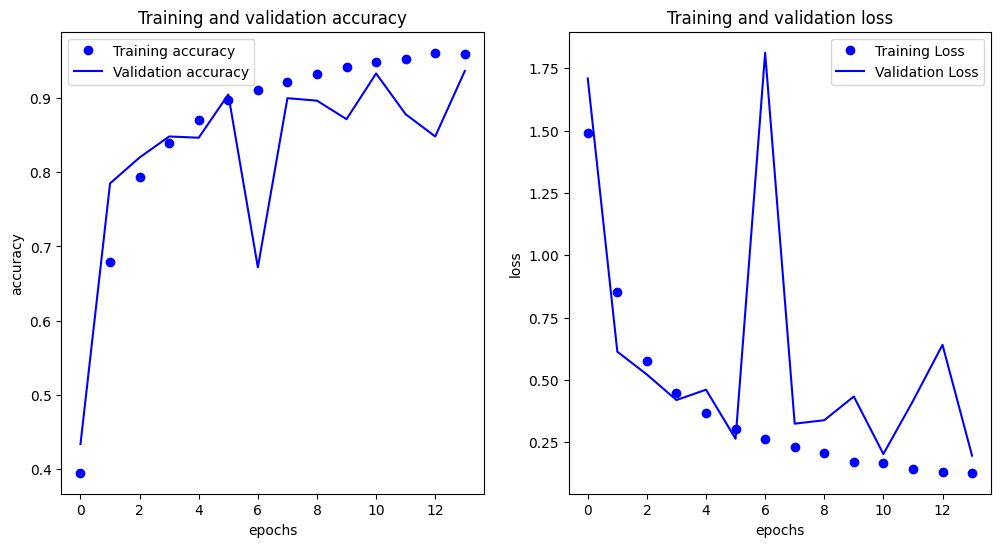

In [ ]:
def plot_loss_acc(history):
  '''Plots the training and validation loss and accuracy from a history object'''
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  fig, ax = plt.subplots(1,2, figsize=(12, 6))
  ax[0].plot(epochs, acc, 'bo', label='Training accuracy')
  ax[0].plot(epochs, val_acc, 'b', label='Validation accuracy')
  ax[0].set_title('Training and validation accuracy')
  ax[0].set_xlabel('epochs')
  ax[0].set_ylabel('accuracy')
  ax[0].legend()

  ax[1].plot(epochs, loss, 'bo', label='Training Loss')
  ax[1].plot(epochs, val_loss, 'b', label='Validation Loss')
  ax[1].set_title('Training and validation loss')
  ax[1].set_xlabel('epochs')
  ax[1].set_ylabel('loss')
  ax[1].legend()

  plt.show()

plot_loss_acc(history)

In [ ]:
# Create the widget and take care of the display
uploader = widgets.FileUpload(accept="image/*", multiple=True)
display(uploader)
out = widgets.Output()
display(out)

def file_predict(filename, file, out):
    """ A function for creating the prediction and printing the output."""
    image = tf.keras.utils.load_img(file, target_size=(150, 150))
    image = tf.keras.utils.img_to_array(image)
    image = np.expand_dims(image, axis=0)

    prediction = model.predict(image, verbose=0)[0]

    with out:

        print(f'\nmodel output: {prediction}')
        
        prediction_index = np.argmax(prediction)
        
        classes = ["bacterial", "early", "mold", "target spot", "yellow", "healthy"]
        
        predicted_class = classes[prediction_index]
        
        print(f'{filename} is {predicted_class}')


def on_upload_change(change):
    """ A function for geting files from the widget and running the prediction."""
    # Get the newly uploaded file(s)
    
    items = change.new
    for item in items: # Loop if there is more than one file uploaded  
        file_jpgdata = BytesIO(item.content)
        file_predict(item.name, file_jpgdata, out)


uploader.observe(on_upload_change, names='value')

FileUpload(value=(), accept='image/*', description='Upload', multiple=True)

Output()

In [ ]:
# Widget untuk upload file
uploader = widgets.FileUpload(accept="image/*", multiple=True)
display(uploader)

# Widget untuk menampilkan output
out = widgets.Output()
display(out)

# Kelas prediksi (disesuaikan dengan model Anda)
classes = ["bacterial", "early", "mold", "target spot", "yellow", "healthy"]

# Fungsi untuk prediksi
def file_predict(filename, file, out_widget):
    """Fungsi untuk memproses file gambar dan membuat prediksi."""
    try:
        # Memuat dan memproses gambar
        image = tf.keras.utils.load_img(file, target_size=(150, 150))
        image = tf.keras.utils.img_to_array(image)
        image = np.expand_dims(image, axis=0)  # Menambahkan dimensi batch

        # Melakukan prediksi
        prediction = model.predict(image, verbose=0)[0]
        prediction_index = np.argmax(prediction)
        predicted_class = classes[prediction_index]
        confidence = prediction[prediction_index]

        # Menampilkan hasil
        with out_widget:
            out_widget.clear_output()  # Membersihkan output sebelumnya
            print(f"\nFile: {filename}")
            print(f"Prediksi: {predicted_class} ({confidence:.2f})")
            print(f"Output Model: {prediction}")

    except Exception as e:
        # Menangani kesalahan
        with out_widget:
            print(f"Error memproses file {filename}: {e}")

# Fungsi untuk menangani perubahan di widget uploader
def on_upload_change(change):
    """Fungsi untuk menangani file yang diunggah."""
    items = change.new  # File yang baru diunggah
    for item in items:  # Memproses setiap file
        try:
            file_jpgdata = BytesIO(item.content)  # Konversi file menjadi stream
            file_predict(item.name, file_jpgdata, out)
        except Exception as e:
            with out:
                print(f"Error membaca file {item.name}: {e}")

# Observasi perubahan pada uploader
uploader.observe(on_upload_change, names="value")

FileUpload(value=(), accept='image/*', description='Upload', multiple=True)

Output()

In [12]:
model.save("./saved_model/model.h5")
export_dir = './saved_model/'
tf.saved_model.save(model, export_dir)
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()
tflite_model_file = pathlib.Path('tomato.tflite')
tflite_model_file.write_bytes(tflite_model)

c:\Users\dimas\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


INFO:tensorflow:Assets written to: ./saved_model/assets


INFO:tensorflow:Assets written to: ./saved_model/assets


13904968

INFO:tensorflow:Assets written to: ./saved_model/assets


INFO:tensorflow:Assets written to: ./saved_model/assets


In [ ]:
tflite_model_file = pathlib.Path('tomato.tflite')
tflite_model_file.write_bytes(tflite_model)


13904968

In [ ]:
from tensorflow.keras.models import load_model

# Load the H5 model
model = load_model(pathlib.Path('tomato.h5'))

# Get the model architecture as JSON
model_json = model.to_json()

# Save the model architecture to a JSON file
with open('model_architecture.json', 'w') as json_file:
    json_file.write(model_json)

TypeError: Error when deserializing class 'InputLayer' using config={'batch_shape': [None, 150, 150, 3], 'dtype': 'float32', 'sparse': False, 'name': 'input_layer_3'}.

Exception encountered: Unrecognized keyword arguments: ['batch_shape']

In [17]:
# EXERCISE: Save the trained model as a Keras HDF5 file. 

saved_model_path = "./saved_model/my_model.h5"

model.save(saved_model_path)

In [21]:
!tensorflowjs_converter --input_format=keras {saved_model_path} ./


Traceback (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\dimas\AppData\Local\Programs\Python\Python311\Scripts\tensorflowjs_converter.exe\__main__.py", line 4, in <module>
  File "C:\Users\dimas\AppData\Local\Programs\Python\Python311\Lib\site-packages\tensorflowjs\__init__.py", line 21, in <module>
    from tensorflowjs import converters
  File "C:\Users\dimas\AppData\Local\Programs\Python\Python311\Lib\site-packages\tensorflowjs\converters\__init__.py", line 21, in <module>
    from tensorflowjs.converters.converter import convert
  File "C:\Users\dimas\AppData\Local\Programs\Python\Python311\Lib\site-packages\tensorflowjs\converters\converter.py", line 38, in <module>
    from tensorflowjs.converters import tf_saved_model_conversion_v2
  File "C:\Users\dimas\AppData\Local\Programs\Python\Python311\Lib\site-packages\tensorflowjs\converters\tf_saved_model_conversion_v2.py", line 28, in

In [24]:
!zip submission.zip *.bin model.json


'zip' is not recognized as an internal or external command,
operable program or batch file.
